Plot and possibly adjust friction settings for better phasing in Alviso

In [13]:
import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from stompy.grid import unstructured_grid
from stompy.model.delft import dfm_grid
%matplotlib inline

In [3]:
ls inputs-static

deltabay.ldb*           observation-points.prj  README.md
friction12e.xyz         observation-points.qpj  RioVista.pli
Jersey.pli              observation-points.shp  SB-observationcrosssection.pli*
merged_2m.tif@          observation-points.shx  Sea.pli
observation-points.dbf  orig-saltopini.xyz      updated_cross_sections.pli*


In [4]:
fric_xyz = np.loadtxt('inputs-static/friction12e.xyz')

In [7]:
g=dfm_grid.DFMGrid('lsb_v99_bathy_net.nc')

In [16]:
# Load DFM's version of the interpolatd friction coefficients
dfm_fric=np.loadtxt('runs/short_summer2016_02b/DFM_interpreted_values_friction12e.xyz')

(565000.0, 600000.0, 4138000.0, 4155000.0)

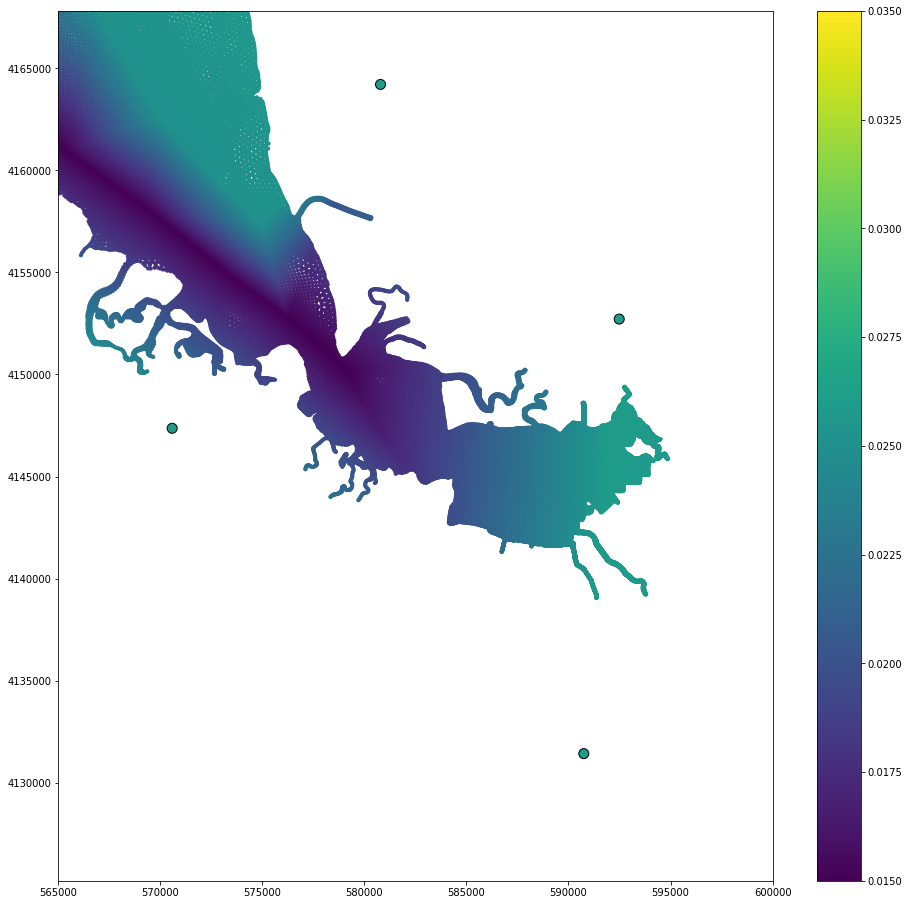

In [20]:
plt.figure(figsize=(16,16))
ax=plt.gca()
zoom=(565e3, 600e3, 4.138e6, 4.155e6)
# g.plot_edges(ax=ax,clip=zoom,color='k',lw=0.4)
scat=ax.scatter(fric_xyz[:,0], fric_xyz[:,1], 100, fric_xyz[:,2],lw=1.,vmin=0.015,vmax=0.035)
scat.set_edgecolor('k')
scat2=ax.scatter(dfm_fric[:,0], dfm_fric[:,1], 10, dfm_fric[:,2],vmin=0.015,vmax=0.035)
plt.colorbar(scat)
ax.axis('equal')
ax.axis(zoom)


In [14]:
ds=xr.open_dataset('runs/short_summer2016_02b/DFM_OUTPUT_short_summer2016_02b/short_summer2016_02b_0000_20160601_000000_map.nc')

In [15]:
ds.czs # Effective Chezy roughness.

<xarray.DataArray 'czs' (time: 6, nFlowElem: 5896)>
array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])
Coordinates:
    FlowElem_xcc  (nFlowElem) float64 ...
    FlowElem_ycc  (nFlowElem) float64 ...
  * time          (time) datetime64[ns] 2016-06-01 2016-06-01T00:30:00 ...
Dimensions without coordinates: nFlowElem
Attributes:
    long_name:  Chezy roughness
    units:      m0.5s-1

In [ ]:
# add a box of higher roughness
nw=[584000,4.148e6]
se=[595000,4.139e6]
